In [59]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from utils import *

Generating data and splitting it into train, test and CV data sets.

In [60]:
X, y, centers, classes, std = gen_blobs()
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.5, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.20, random_state=1)

print(f'X_train.shape: {X_train.shape}\nX_cv.shape: {X_cv.shape}\nX_test.shape: {X_test.shape}')

X_train.shape: (400, 2)
X_cv.shape: (320, 2)
X_test.shape: (80, 2)


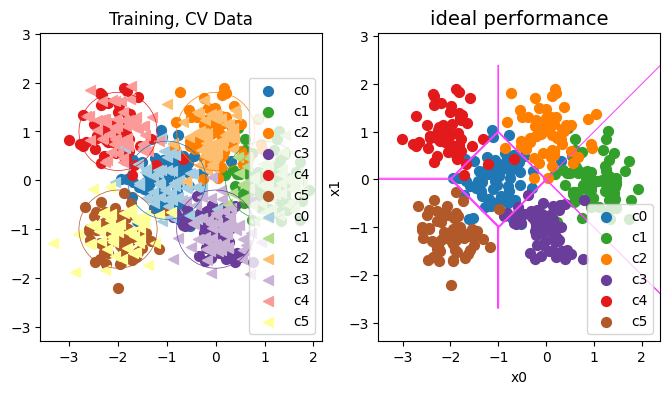

In [61]:
plt_blobs_ideal(X_train, y_train, classes, X_cv, y_cv, centers, std)

'Complex' model without regularization.

In [62]:
tf.random.set_seed(1234)

model = Sequential(
    [
        Dense(120, activation='relu'),
        Dense(40, activation='relu'),
        Dense(20, activation='relu'),
        Dense(classes, activation='linear')
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [63]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1811
Epoch 2/1000
13/13 [==============================] - 0s 917us/step - loss: 0.4540
Epoch 3/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3718
Epoch 4/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2762
Epoch 5/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2768
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2945
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 8/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2394
Epoch 9/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2422
Epoch 10/1000
13/13 [==============================] - 0s 833us/step - loss: 0.2388
Epoch 11/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2407
Epoch 12/1000
13/13 [==============================] - 0s 916us/step - loss: 0.2372
Epoch 1

In [64]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 120)               360       
                                                                 
 dense_46 (Dense)            (None, 40)                4840      
                                                                 
 dense_47 (Dense)            (None, 20)                820       
                                                                 
 dense_48 (Dense)            (None, 6)                 126       
                                                                 
Total params: 6146 (24.01 KB)
Trainable params: 6146 (24.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 1s 747us/step


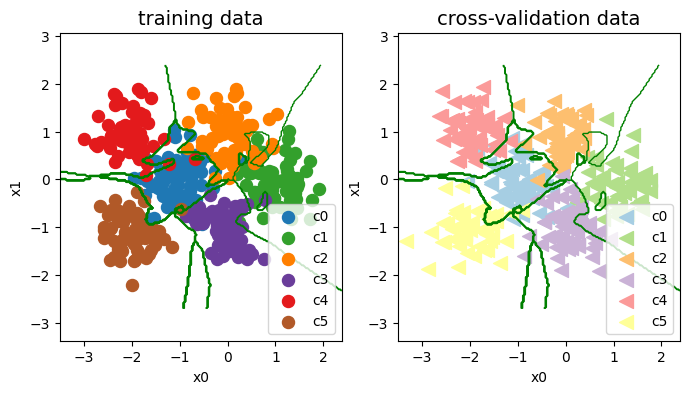

In [65]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv)

Lovecraftian looking overfit

In [66]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 778us/step
categorization error, training, complex model: 0.013
categorization error, cv,       complex model: 0.116


Simpler model.


In [67]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation='relu'),
        Dense(5, activation='relu'),
        Dense(classes, activation='linear')

    ]
)

model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [68]:
model_s.fit(
    X_train, y_train, 
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.8051
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.6441
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.4192
Epoch 4/1000
13/13 [==============================] - 0s 917us/step - loss: 1.1503
Epoch 5/1000
13/13 [==============================] - 0s 917us/step - loss: 0.9117
Epoch 6/1000
13/13 [==============================] - 0s 916us/step - loss: 0.7245
Epoch 7/1000
13/13 [==============================] - 0s 917us/step - loss: 0.5909
Epoch 8/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4896
Epoch 9/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4197
Epoch 10/1000
13/13 [==============================] - 0s 833us/step - loss: 0.3683
Epoch 11/1000
13/13 [==============================] - 0s 750us/step - loss: 0.3319
Epoch 12/1000
13/13 [==============================] - 0s 834us/step - loss: 0.3176
Epoch 1

In [69]:
model_s.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 6)                 18        
                                                                 
 dense_50 (Dense)            (None, 5)                 35        
                                                                 
 dense_51 (Dense)            (None, 6)                 36        
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 1s 535us/step


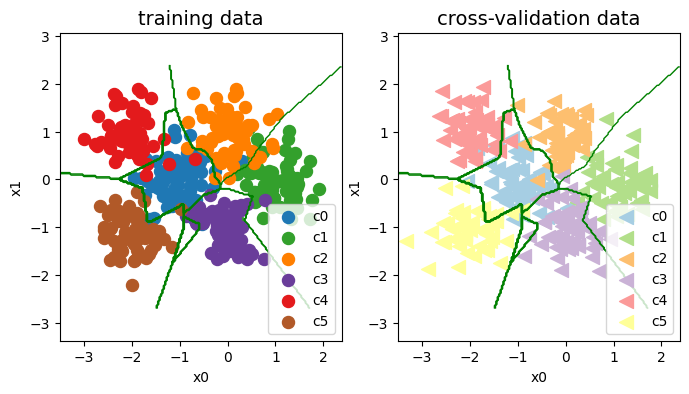

In [70]:
model_predict_s = lambda Xb: np.argmax(tf.nn.softmax(model_s.predict(Xb)).numpy(), axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv)

Bettah

In [72]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 889us/step
categorization error, training, simple model, 0.065, complex model: 0.013
categorization error, cv,       simple model, 0.087, complex model: 0.116


Now lets add regularization

In [ ]:

tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(classes, activation='linear')
    ]
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [73]:
model_r.fit(
    X_train, y_train, 
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3159
Epoch 2/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3270
Epoch 3/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3371
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3277
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3129
Epoch 6/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.3207
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3590
Epoch 8/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3253
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3129
Epoch 10/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.3110
Epoch 11/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3289
Epoch 12/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3335
Epoch 13/

In [74]:
model_r.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 120)               360       
                                                                 
 dense_43 (Dense)            (None, 40)                4840      
                                                                 
 dense_44 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5446 (21.27 KB)
Trainable params: 5446 (21.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 1s 544us/step


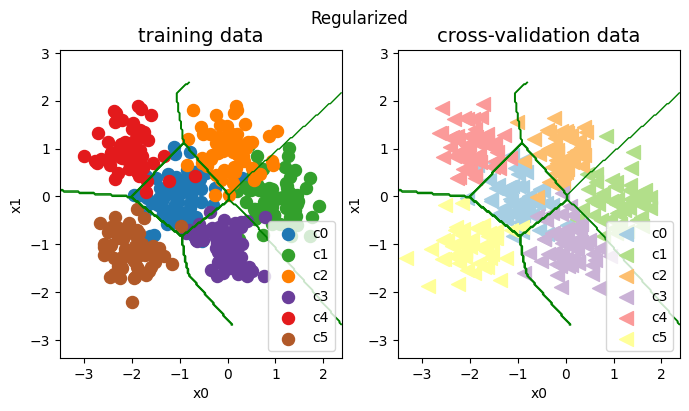

In [75]:
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

Pretty good, close to ideal

In [76]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 1000us/step
categorization error, training, regularized: 0.070, simple model, 0.065, complex model: 0.013
categorization error, cv,       regularized: 0.075, simple model, 0.087, complex model: 0.116


Now lets iterate through few lambdas to find the most optimal one

In [78]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.1, 0.2, 0.3]
num_lambdas = len(lambdas)
models = [None] * num_lambdas

for i in range(num_lambdas):
    lambda_ = lambdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation='linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01)
    )

    models[i].fit(
        X_train, y_train,
        epochs=1000
    )

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0116
Epoch 2/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.3797
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3109
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2674
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2458
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2702
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2402
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2252
Epoch 9/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2354
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1988
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 12/1000
13/13 [==============================] - 0s 916us/step - loss: 0.2042
Epoch 13/1000
13/1

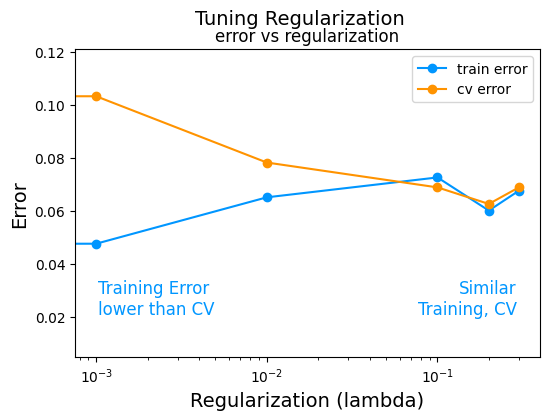

In [80]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

In [81]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

NameError: name 'plt_compare' is not defined